In [81]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [82]:
x=sym.Symbol("x",real=True)
y=sym.Symbol("y",real=True)

In [83]:
z=x+sym.I*y
z

x + I*y

In [84]:
f=z**3-1
f

(x + I*y)**3 - 1

In [85]:
F=[sym.re(f),sym.im(f)]
F

[x**3 - 3*x*y**2 - 1, 3*x**2*y - y**3]

In [86]:
def Jacobian (f):
    J=[[],[]]
    J[0].append(sym.diff(f[0],x,1))
    J[0].append(sym.diff(f[0],y,1))
    J[1].append(sym.diff(f[1],x,1))
    J[1].append(sym.diff(f[1],y,1))
    return J
J=Jacobian(F)
J

[[3*x**2 - 3*y**2, -6*x*y], [6*x*y, 3*x**2 - 3*y**2]]

In [87]:
Jn=sym.lambdify([x,y],J,'numpy')
Jn

<function _lambdifygenerated(x, y)>

In [88]:
Fn=sym.lambdify([x,y],F,'numpy')
Fn

<function _lambdifygenerated(x, y)>

In [89]:
def NewtonRaphson(z0,Fn,Jn,e=1*10**-7):
    parar=False
    while not parar:
        
        x= z0[0]
        y= z0[1]
        if x!=0 and y!=0:
          data=[x,y]-(np.linalg.inv(Jn(x,y))@Fn(x,y)) 
          if np.linalg.norm(data-z0)<e:
            return data
        z0=data

In [90]:
z0=np.array([0.5,0.5])

NewtonRaphson(z0,Fn,Jn)

array([-0.5      ,  0.8660254])

In [91]:
N=300
x=np.linspace(-1,1,N)
y=np.linspace(-1,1,N)

In [92]:
Fractal=np.zeros((N,N),np.int64)

In [93]:
zr0=np.array([-0.5,np.sqrt(3)/2])
zr1=np.array([-0.5,-np.sqrt(3)/2])
zr2=np.array([1,0])
e=1*10**-7

In [94]:
for i in range(len(x)):
    for j in range(len(y)):
        zij=np.array([x[i],y[j]])
        res=NewtonRaphson(zij,Fn,Jn)
        if np.linalg.norm(zr0-res)<e:
            Fractal[i][j]=20
        
        elif np.linalg.norm(zr0-res)<e:
            Fractal[i][j]=100
        
        elif np.linalg.norm(zr0-res)<e:
            Fractal[i][j]=255

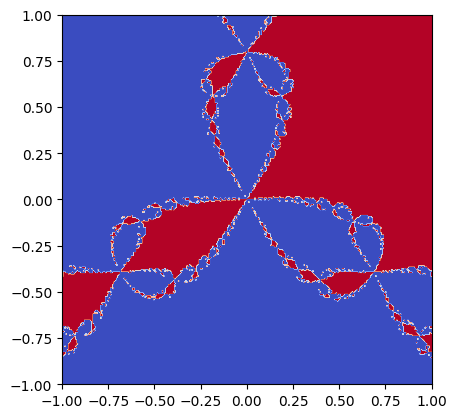

In [95]:
plt.imshow(Fractal,cmap='coolwarm',extent=[-1,1,-1,1])